In [12]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
import sklearn as sk
import tensorflow as tf

In [13]:
#default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [14]:
## creating a custom missing value list
missing_values = ["NA","N/a",np.nan,"?"]

u1 = pd.read_csv('DataSets/Breast cancer dataset/breast-cancer-wisconsin.data',header=None,na_values=missing_values)
l1 = pd.read_csv('DataSets/Breast cancer dataset/breast-cancer-wisconsin.data',header=None,na_values=missing_values, names=['id','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','diagnosis'])

##convert the bare_nuclei colmn to a number and drop the rows
#l1['bare_nuclei'] = pd.to_numeric(l1['bare_nuclei'],errors='coerce')

#check data is clean
l1.isnull().sum()
l1.head()

print(l1.dtypes)

##drop the rows with missing data

u1= u1.dropna()
l1 = l1.dropna()

## lets look at the data
print("u1")
print(u1.head())
print("l1")
print(l1.head())


id                               int64
clump_thickness                  int64
uniformity_of_cell_size          int64
uniformity_of_cell_shape         int64
marginal_adhesion                int64
single_epithelial_cell_size      int64
bare_nuclei                    float64
bland_chromatin                  int64
normal_nucleoli                  int64
mitoses                          int64
diagnosis                        int64
dtype: object
u1
        0   1   2   3   4   5     6   7   8   9   10
0  1000025   5   1   1   1   2   1.0   3   1   1   2
1  1002945   5   4   4   5   7  10.0   3   2   1   2
2  1015425   3   1   1   1   2   2.0   3   1   1   2
3  1016277   6   8   8   1   3   4.0   3   7   1   2
4  1017023   4   1   1   3   2   1.0   3   1   1   2
l1
        id  clump_thickness  uniformity_of_cell_size  \
0  1000025                5                        1   
1  1002945                5                        4   
2  1015425                3                        1   
3  101627

In [15]:
# checking the types of features
l1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           683 non-null    int64  
 1   clump_thickness              683 non-null    int64  
 2   uniformity_of_cell_size      683 non-null    int64  
 3   uniformity_of_cell_shape     683 non-null    int64  
 4   marginal_adhesion            683 non-null    int64  
 5   single_epithelial_cell_size  683 non-null    int64  
 6   bare_nuclei                  683 non-null    float64
 7   bland_chromatin              683 non-null    int64  
 8   normal_nucleoli              683 non-null    int64  
 9   mitoses                      683 non-null    int64  
 10  diagnosis                    683 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


In [16]:
l1.shape

(683, 11)

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

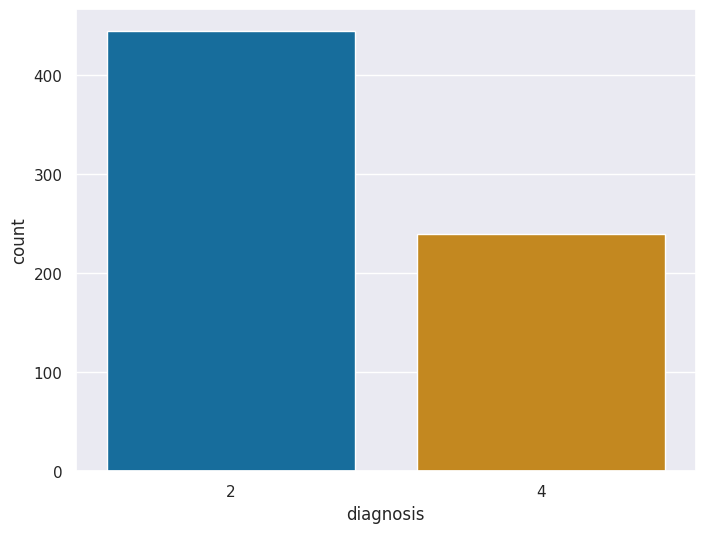

In [17]:
#plotting the benign and malicioud diagnosis 
plt.figure(figsize = (8,6))
sns.countplot(x = 'diagnosis', data = l1)

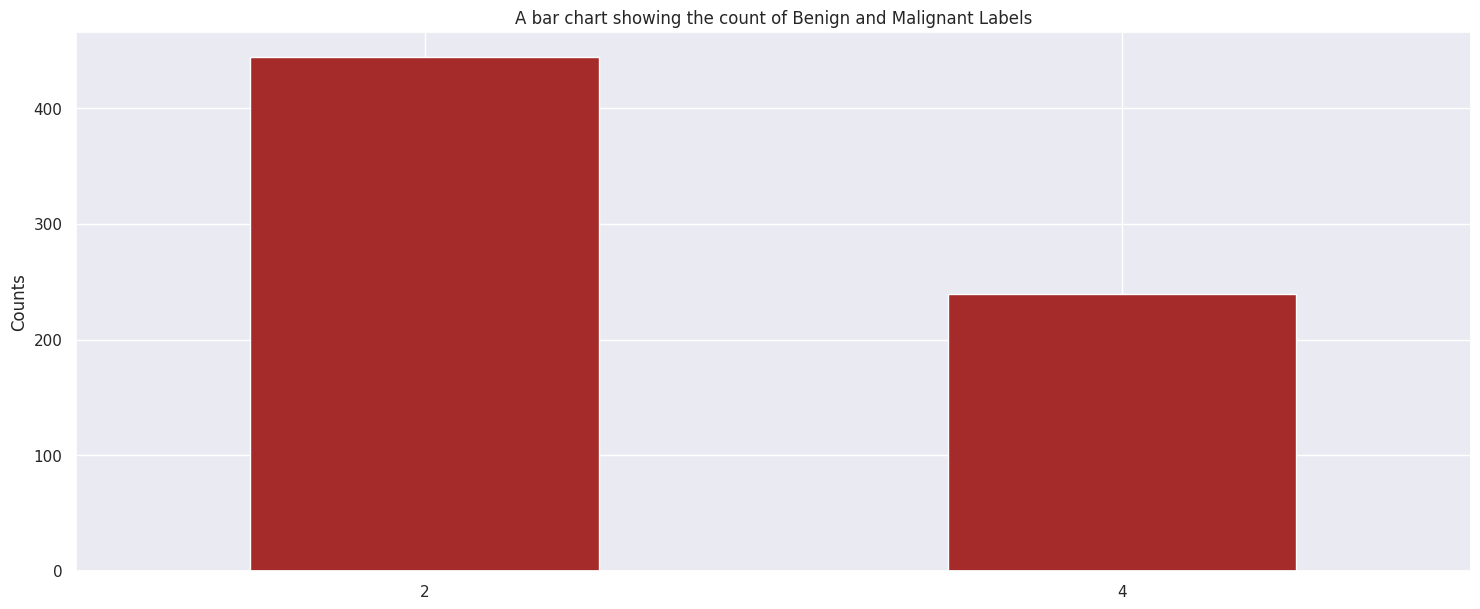

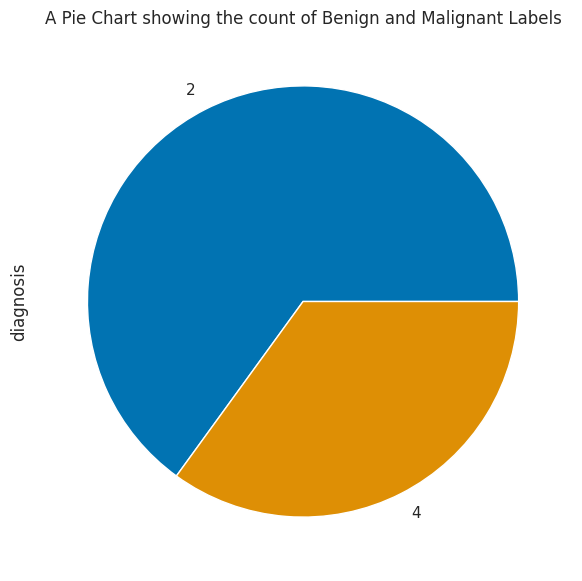

Number of Benign: 444
Number of Malignant: 239


In [18]:
# Getting the value count for the two labels in the diagnosis column
value_count = l1['diagnosis'].value_counts() 

# Setting the figure size of the plot 
plt.figure(figsize = (18, 7))

# Plotting the Count for the value counts in the diagnosis column
value_count.plot(kind = "bar", color = "brown", rot=0)
plt.ylabel("Counts")
plt.title("A bar chart showing the count of Benign and Malignant Labels")
plt.grid(True)
plt.show() 

# Plotting a pie chart of the imbalanced dataset 
value_count.plot(kind = "pie", figsize=(18, 7))
plt.title("A Pie Chart showing the count of Benign and Malignant Labels")
plt.show() 

# Printing the number of counts for the values of the labels in the diagnosis column 
B, M = value_count 
print("Number of Benign: {}".format(B))
print("Number of Malignant: {}".format(M))

Text(0.5, 1.05, 'Correlation of df Features')

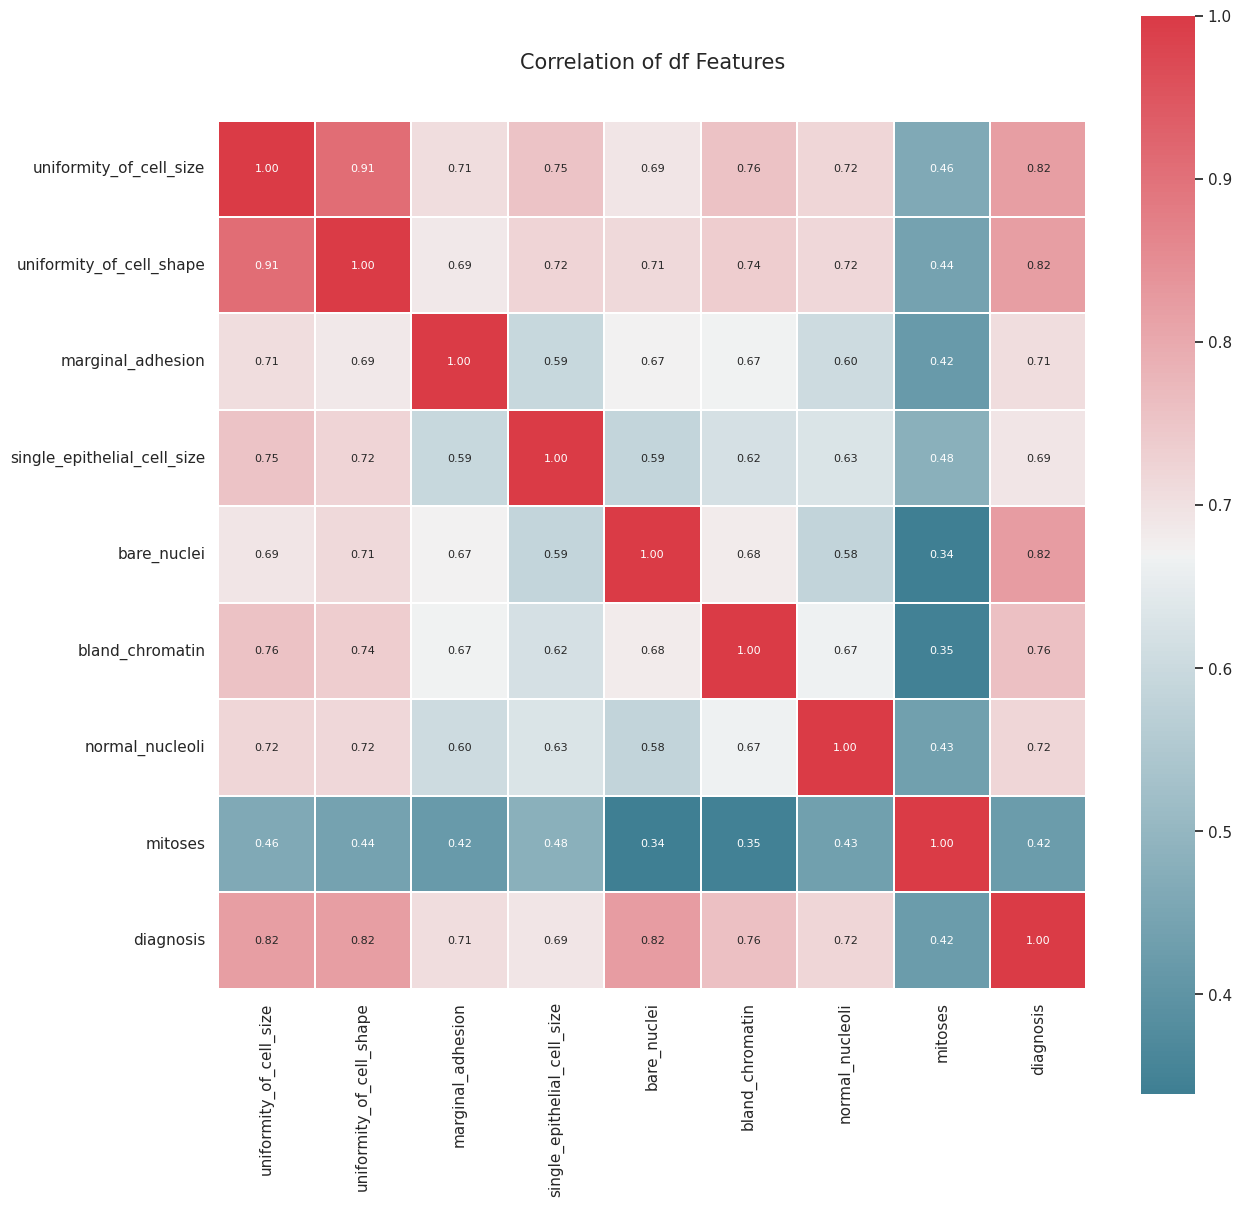

In [19]:
#creating a confusion matrix
# plt.figure(figsize=(16,14))
# sns.heatmap(l1.corr(), cmap='Greens', annot = True)
# plt.title("Correlation Map", fontweight = "bold", fontsize=16)

#defining dependent and independent variables
# x = l1.drop('diagnosis', axis=1)
# y = l1['diagnosis']

# Select upper triangle of correlation matrix
# upper = l1.corr().where(np.triu(np.ones(l1.corr().shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
#print(to_drop)
# Drop features 
#l1.drop(to_drop, axis=1, inplace=True)

corr = l1.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of df Features', y=1.05, size=15)

In [20]:
#defining dependent and independent variables
x = l1.drop('diagnosis', axis=1)
y = l1['diagnosis']

In [21]:
# Select upper triangle of correlation matrix
##upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)) this requires numpy 1.23 or older
upper= corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)
# Drop features 
l1.drop(to_drop, axis=1, inplace=True)

/tmp/ipykernel_2978/1095502396.py:2: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


AttributeError: module 'numpy' has no attribute 'bool'

In [22]:
len(l1.columns)

11

In [23]:
l1.isnull().sum()

id                             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
diagnosis                      0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
#creating the object
lb = LabelEncoder()
y = lb.fit_transform(y)

In [25]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [26]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [27]:
from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann =Sequential()

#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#ADDING 2ND HIDDEN LAYER WITH 30 NEURONS
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))

2023-01-01 23:14:26.731950: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-01 23:14:26.741400: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-01 23:14:26.743891: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (chris6): /proc/driver/nvidia/version does not exist
2023-01-01 23:14:26.773382: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
